**Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.**

**Data Description:**

**Murder -- Muder rates in different places of United States**

**Assualt- Assualt rate in different places of United States**

**UrbanPop - urban population in different places of United States**

**Rape - Rape rate in different places of United States**

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime_data=pd.read_csv('crime_data.csv')

In [3]:
crime=crime_data.copy()
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
#Renaming the column
crime.columns=['Cities','Murder','Assault','UrbanPop','Rape']
crime

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EXPLORATORY DATA ANALYSIS

In [5]:
crime.head()

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime.shape

(50, 5)

In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cities    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
#Removing unwanted column
df=crime.copy()
df =df.drop(columns=['Cities'])
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8



## STANDARDIZING VALUES

In [9]:
from sklearn.preprocessing import StandardScaler
std_df=StandardScaler().fit(df).transform(df)
std_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## NORMALIZING VALUES

In [10]:
from sklearn.preprocessing import MinMaxScaler
norm_df =MinMaxScaler().fit(df).transform(df)
norm_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

# Building Hierarchical Model On Standardized Data

## Calculating Distance And Generating Dendrogram 

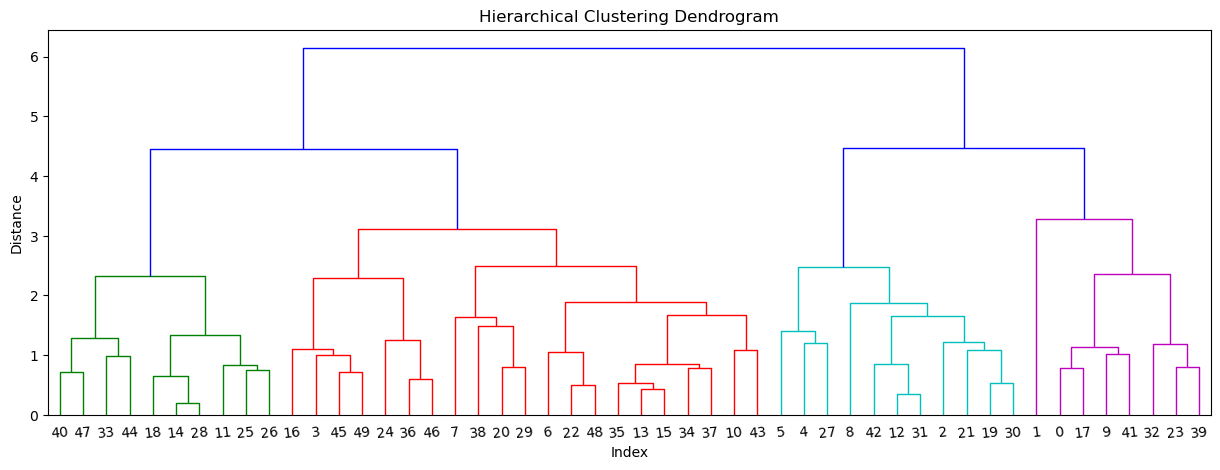

In [11]:
import scipy.cluster.hierarchy as sch
z=sch.linkage(std_df,method='complete',metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.style.use('classic')
sch.dendrogram(
    z,
    leaf_rotation=6.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()     

## AGGLOMERATIVE CLUSTERING

In [12]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(std_df) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['h_cluster_std']=cluster_labels # creating a  new column and assigning it to new column 
crime

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [13]:
crime.iloc[:,1:].groupby(crime.h_cluster_std).mean()  

,Murder,Assault,UrbanPop,Rape,h_cluster_std
h_cluster_std,,,,,
0,5.871429,134.476190,70.761905,18.580952,0.0
1,14.671429,251.285714,54.285714,21.685714,1.0
2,11.054545,264.090909,79.090909,32.618182,2.0
3,3.180000,78.700000,49.300000,11.630000,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


In [14]:
# Data points in cluster 0
data=crime[crime.h_cluster_std==0]
data

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
22,Minnesota,2.7,72,66,14.9,0
24,Missouri,9.0,178,70,28.2,0


In [15]:
# Data points in cluster 1
data=crime[crime.h_cluster_std==1]
data

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std
0,Alabama,13.2,236,58,21.2,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [16]:
# Data points in cluster 2
data=crime[crime.h_cluster_std==2]
data

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
27,Nevada,12.2,252,81,46.0,2
30,New Mexico,11.4,285,70,32.1,2
31,New York,11.1,254,86,26.1,2


In [17]:
# Data points in cluster 3
data=crime[crime.h_cluster_std==3]
data

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3


In [18]:
# Data points in cluster 4
data=crime[crime.h_cluster_std==4]
data

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std
1,Alaska,10.0,263,48,44.5,4


### Silhouette Score

In [19]:
from sklearn.metrics import silhouette_score
sc_hc_std=silhouette_score(df,cluster_labels)
sc_hc_std

0.07251284693505926

**Since, cluster-4 has only a single record and silhoette score is very close to 0, the clustering is not considered to be the best model**

**Hence, we use a different clustering model**

# Building Hierarchical Model On NormalizedData

## Calculating Distance And Generating Dendrogram 

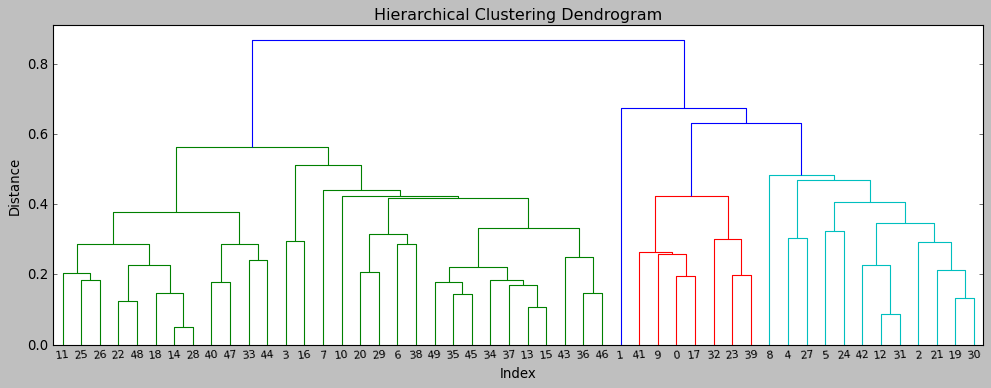

In [20]:
z=sch.linkage(norm_df,method='average',metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.style.use('classic')
sch.dendrogram(
    z,
    leaf_rotation=6.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()     

## AGGLOMERATIVE CLUSTERING

In [21]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(std_df) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['h_cluster_norm']=cluster_labels # creating a  new column and assigning it to new column 
crime

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm
0,Alabama,13.2,236,58,21.2,1,3
1,Alaska,10.0,263,48,44.5,4,2
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,2,1
5,Colorado,7.9,204,78,38.7,2,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,2,1
9,Georgia,17.4,211,60,25.8,1,3


In [22]:
crime.iloc[:,1:].groupby(crime.h_cluster_norm).mean()  

,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm
h_cluster_norm,,,,,,
0,4.870000,114.433333,63.633333,15.943333,1.000000,0.0
1,10.883333,256.916667,78.333333,32.250000,1.833333,1.0
2,10.000000,263.000000,48.000000,44.500000,4.000000,2.0
3,14.671429,251.285714,54.285714,21.685714,1.000000,3.0


In [23]:
# Data points in cluster 0
data=crime[crime.h_cluster_norm==0]
data

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm
3,Arkansas,8.8,190,50,19.5,0,0
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
10,Hawaii,5.3,46,83,20.2,0,0
11,Idaho,2.6,120,54,14.2,3,0
13,Indiana,7.2,113,65,21.0,0,0
14,Iowa,2.2,56,57,11.3,3,0
15,Kansas,6.0,115,66,18.0,0,0
16,Kentucky,9.7,109,52,16.3,0,0
18,Maine,2.1,83,51,7.8,3,0


In [24]:
# Data points in cluster 1
data=crime[crime.h_cluster_norm==1]
data

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm
2,Arizona,8.1,294,80,31.0,2,1
4,California,9.0,276,91,40.6,2,1
5,Colorado,7.9,204,78,38.7,2,1
8,Florida,15.4,335,80,31.9,2,1
12,Illinois,10.4,249,83,24.0,2,1
19,Maryland,11.3,300,67,27.8,2,1
21,Michigan,12.1,255,74,35.1,2,1
24,Missouri,9.0,178,70,28.2,0,1
27,Nevada,12.2,252,81,46.0,2,1
30,New Mexico,11.4,285,70,32.1,2,1


In [25]:
# Data points in cluster 2
data=crime[crime.h_cluster_norm==2]
data

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm
1,Alaska,10.0,263,48,44.5,4,2


In [26]:
# Data points in cluster 3
data=crime[crime.h_cluster_norm==3]
data

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm
0,Alabama,13.2,236,58,21.2,1,3
9,Georgia,17.4,211,60,25.8,1,3
17,Louisiana,15.4,249,66,22.2,1,3
23,Mississippi,16.1,259,44,17.1,1,3
32,North Carolina,13.0,337,45,16.1,1,3
39,South Carolina,14.4,279,48,22.5,1,3
41,Tennessee,13.2,188,59,26.9,1,3


### Silhouette Score

In [27]:
from sklearn.metrics import silhouette_score
sc_hc_norm=silhouette_score(df,cluster_labels)
sc_hc_norm

0.2529090053099124

**Since, cluster-2 has only a single record and silhoette score is very close to 0, the clustering is not considered to be the best model**

**Hence, we use a different clustering model**

# BUILDING K-MEANS CLUSTERING MODEL On Standardized Data

## APPLYING ELBOW CURVE TO OBTAIN OPTIMAL K-VALUE

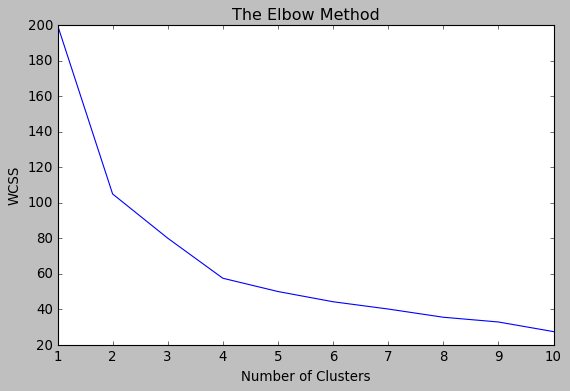

In [28]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(8,5))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i).fit(std_df)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [29]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(std_df)  
y_kmeans

array([0, 3, 3, 0, 3, 3, 2, 2, 3, 0, 2, 1, 3, 2, 1, 2, 1, 0, 1, 3, 2, 3,
       1, 0, 3, 1, 1, 3, 1, 2, 3, 3, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 3, 2,
       1, 2, 2, 1, 1, 2])

In [30]:
clf.inertia_

57.55425863091106

In [31]:
WCSS

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091106,
 50.08743315681841,
 44.33228705060299,
 40.23576140518838,
 35.616601478559346,
 32.94875859510936,
 27.537434435805764]

In [32]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['kmeans_cluster_std']=md # creating a  new column and assigning it to new column 
crime 

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm,kmeans_cluster_std
0,Alabama,13.2,236,58,21.2,1,3,0
1,Alaska,10.0,263,48,44.5,4,2,3
2,Arizona,8.1,294,80,31.0,2,1,3
3,Arkansas,8.8,190,50,19.5,0,0,0
4,California,9.0,276,91,40.6,2,1,3
5,Colorado,7.9,204,78,38.7,2,1,3
6,Connecticut,3.3,110,77,11.1,0,0,2
7,Delaware,5.9,238,72,15.8,0,0,2
8,Florida,15.4,335,80,31.9,2,1,3
9,Georgia,17.4,211,60,25.8,1,3,0


In [33]:
crime.iloc[:,1:].groupby(crime.kmeans_cluster_std).mean()  

,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm,kmeans_cluster_std
kmeans_cluster_std,,,,,,,
0,13.937500,243.625000,53.750000,21.412500,0.875000,2.625000,0.0
1,3.600000,78.538462,52.076923,12.176923,2.307692,0.000000,1.0
2,5.656250,138.875000,73.875000,18.781250,0.000000,0.000000,2.0
3,10.815385,257.384615,76.000000,33.192308,2.000000,1.076923,3.0


## MODEL EVALUATION

In [34]:
plt.style.use(['classic','dark_background']) 
#print(plt.style.available) 

Text(0.5, 1.0, 'Clusters using KMeans')

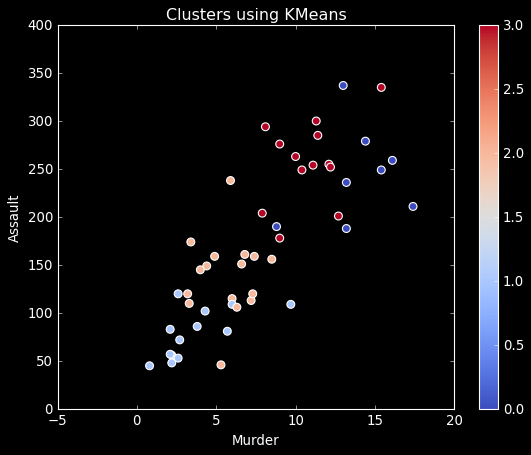

In [35]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

Text(0.5, 1.0, 'Clusters using KMeans')

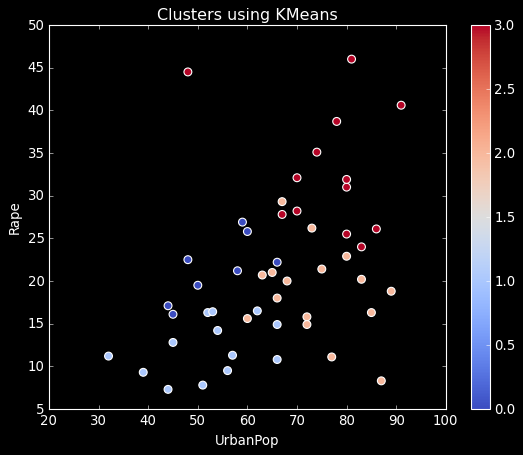

In [36]:
crime.plot(x="UrbanPop",y ="Rape",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

### Silhouette Score

In [37]:
sc_kmeans_std=silhouette_score(df,clf.labels_)
sc_kmeans_std

0.21131210053881153

**Since, there is lot of hetrogenity in the clusters and silhoette score is close to 0, the clustering is not considered to be the best model**

**Hence, we use a different clustering model**

# BUILDING K-MEANS CLUSTERING MODEL On Normalized Data

## APPLYING ELBOW CURVE TO OBTAIN OPTIMAL K-VALUE

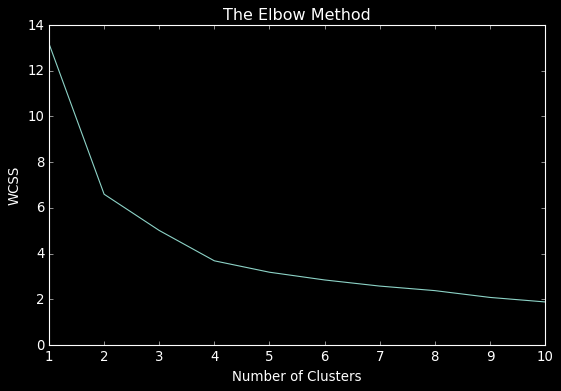

In [38]:
fig = plt.figure(figsize=(8,5))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i).fit(norm_df)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [39]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(norm_df)  
y_kmeans

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1,
       3, 2, 0, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 3, 0])

In [40]:
clf.inertia_

3.6834561535859134

In [41]:
WCSS

[13.184122550256445,
 6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.184261813967722,
 2.8460823177953523,
 2.577999498451258,
 2.3792209558242985,
 2.0819578764925892,
 1.8845426286964562]

In [42]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['kmeans_cluster_norm']=md # creating a  new column and assigning it to new column 
crime 

,Cities,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm
0,Alabama,13.2,236,58,21.2,1,3,0,2
1,Alaska,10.0,263,48,44.5,4,2,3,1
2,Arizona,8.1,294,80,31.0,2,1,3,1
3,Arkansas,8.8,190,50,19.5,0,0,0,2
4,California,9.0,276,91,40.6,2,1,3,1
5,Colorado,7.9,204,78,38.7,2,1,3,1
6,Connecticut,3.3,110,77,11.1,0,0,2,0
7,Delaware,5.9,238,72,15.8,0,0,2,0
8,Florida,15.4,335,80,31.9,2,1,3,1
9,Georgia,17.4,211,60,25.8,1,3,0,2


In [43]:
crime.iloc[:,1:].groupby(crime.kmeans_cluster_norm).mean()  

,Murder,Assault,UrbanPop,Rape,h_cluster_std,h_cluster_norm,kmeans_cluster_std,kmeans_cluster_norm
kmeans_cluster_norm,,,,,,,,
0,5.852941,141.176471,73.647059,19.335294,0.000000,0.058824,2.058824,0.0
1,10.966667,264.000000,76.500000,33.608333,2.166667,1.083333,3.000000,1.0
2,13.937500,243.625000,53.750000,21.412500,0.875000,2.625000,0.000000,2.0
3,3.600000,78.538462,52.076923,12.176923,2.307692,0.000000,1.000000,3.0


## MODEL EVALUATION

In [44]:
plt.style.use(['classic','dark_background']) 

Text(0.5, 1.0, 'Clusters using KMeans')

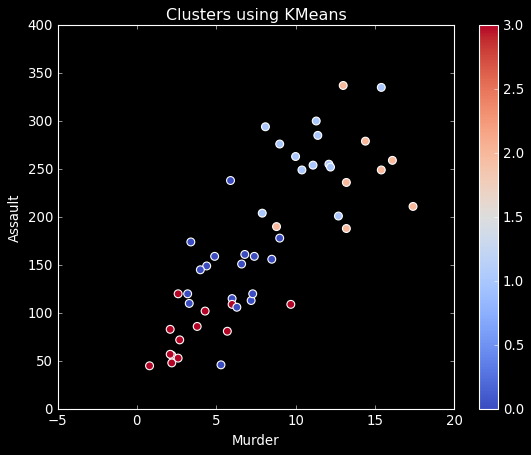

In [45]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

Text(0.5, 1.0, 'Clusters using KMeans')

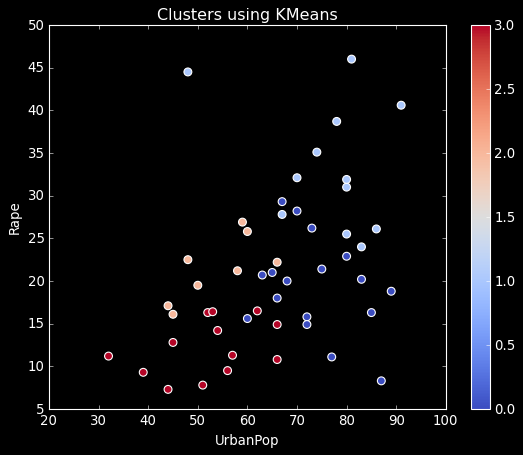

In [46]:
crime.plot(x="UrbanPop",y ="Rape",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

### Silhouette Score

In [47]:
sc_kmeans_norm=silhouette_score(df,clf.labels_)
sc_kmeans_norm

0.2333659874278873

**Since, there is lot of hetrogenity in the clusters and silhoette score is close to 0, the clustering is not considered to be the best model**

**Hence, we use a different clustering model**

# BUILDING DBSCAN CLUSTERING MODEL 

## ESTIMATING EPS & MINPTS

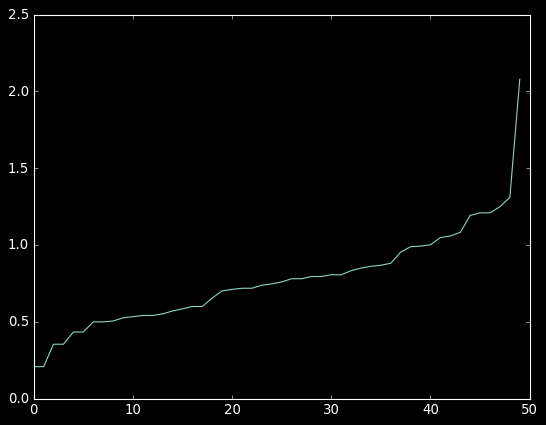

In [48]:
from sklearn.neighbors import NearestNeighbors

neigh=NearestNeighbors(n_neighbors=8).fit(std_df)

distances,indices = neigh.kneighbors(std_df)

distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=22.5,min_samples=5).fit(std_df)
dbs.labels_ #-1 is the label of the nosiy samples

In [ ]:
crime['dbscan_cluster']=dbs.labels_
crime

In [ ]:
# Use pandas filtering and get noisy datapoints -1
crime[crime['dbscan_cluster']==-1]

In [ ]:
crime.iloc[:,1:].groupby(crime.dbscan_cluster).mean()  

### Silhouette Score

In [ ]:
sc_dbscan=silhouette_score(df,crime['dbscan_cluster'])
sc_dbscan

### DBSCAN is not the best model because, it is suitable for large datasets. Since, this is a small dataset there are high chances that DBSCAN may misclassify data as outliers like in this case.

**The model with highest Silhouette Score is the best model**

***Comparing Silhouette Scores of all Models***

In [ ]:
d = {"MODEL":pd.Series(['Hierarchical Clustering','K-Means Clustering']),
     'No.of Clusters for Standardized data':pd.Series([5,4]),
     'No.of Clusters for Normalized data':pd.Series([4,4]),
        "Silhouette Scores on Standardized Data":pd.Series([sc_hc_std,sc_kmeans_std]),
        "Silhouette Scores on Normalized Data":pd.Series([sc_hc_norm,sc_kmeans_norm])}
table=pd.DataFrame(d)
table 

**From the above comparision table:**
### Best Method: Hierarchical Clustering on Normalized Data
### No. of Clusters: 4